In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('ps01.ok')

Assignment: Problem Set 1. The Very Long Run View
OK, version v1.14.20



# Problem set 1. The very long run view

These problem set assignments are a required part of the course.

Collaborating on the problem sets is more than okay—it is encouraged! Seek help from a classmate or an instructor or a roommate or a passerby when you get stuck! (Explaining things is beneficial, too—the best way to solidify your knowledge of a subject is to explain it.) 

But the work has to be your own: no cutting-&-pasting from others' problem sets, please! We want you to learn this stuff, and your fingers typing every keystroke is an important way of building muscle memory here.

In this problem set, you will take a look at the very long-term structure of human economic history since the invention of agriculture 8000 years ago. It is, overwhelmingly, a story of innovation, fecundity and demography, and resources.

Let us get started!

# 1. Preliminaries

### A. Computing environment

First, we set up the computing environment by adding the libraries we need to the bare python core: 

In [2]:
# set up the computing environment: import libraries, & ensure
# that graphs appear inline in the notebook & not in extra
# windows:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

&nbsp;

### B. Basic Data

Next we load in and organize our basic data—or, rather, guesses—of the very long term global structure of human economic history.

We will use estimates of a very few quantities:

* The year at which an observation is made or an era begins, which we will call $ t $ or `year`
* The stock of useful human ideas about technology and organization, which we will call $ H $ or `human_ideas`
* The level of labor efficiency or productivity, which we will call $ E $ or `labor_efficiency`
* In this notetook, $ E $ will be the same as productivity or real income per capita, which we will call $ y $ or `income_level`
* The level of human population, which we will call $ P $ or `population`

Plus:

* The initial year at which each of the eras we divide history into begins, which we will call $ t_{era} $ or `initial_year`
* The span of time each era covers, which we will call `span`
* The proportional growth rates over each era $ n $, $ g $, and $ h $ of human population $ P $; of productivity, labor efficiency, and average income $ E $ and $ y $; and of the ideas stock $ H $.

Run through the process of assembling our estimates and looking at them, executing the code cells, and filling in the gaps where I have left some. And then I will meet you below, and then summarize what I see in the numbers.

In [3]:
# here in this code cell are the "data" (actually, more like  
# guesses) of the verylong-run structure of human economic 
# history. 
#
# in this code cell we set out our numbers, feed them into a 
# python data-storage structure called a 'dataframe', make 
# sure that the dataframe knows that the year is an integer
# & not a floating-point real number (that is what the
# 
#     .apply(np.int64)
#
# means), & set up an extra variable `initial_year`, to remind 
# us of the starting points of all of the periods into which 
# we divide very long-run human economic history.
#
# we feed our estimates to python in a form it easily understands:
# that of a list of lists, where each sublist corresponds to our
# estimate of the state of the human economy at a year in the past,
# from 70000 years ago—the year -68000—to today:

long_run_growth_list = [
    [-68000, 379.47, 1200, 0.1],
    [-8000, 1897.37, 1200, 2.5],
    [-6000, 2381.18, 900, 7],
    [-3000, 3485.68, 900, 15],
    [-1000, 6363.96, 900, 50],
    [1, 11734.56, 900, 170],
    [1500, 20124.61, 900, 500],
    [1770, 30124.74, 1100, 750],
    [1870, 46872.17, 1300, 1300],
    [2020, 1032370.8, 11842, 7600]
    ]

long_run_growth_df = pd.DataFrame(
  data=np.array(long_run_growth_list), columns = ['year', 
  'human_ideas_index', 'income_level', 'population']
  )

long_run_growth_df['year'] = long_run_growth_df['year'].apply(np.int64)

initial_year = long_run_growth_df['year']

In [4]:
# check to make sure the "year" variable is in fact made up of
# integers; if it were real numbers, that would cause trouble
# later on...
long_run_growth_df['year']

0   -68000
1    -8000
2    -6000
3    -3000
4    -1000
5        1
6     1500
7     1770
8     1870
9     2020
Name: year, dtype: int64

Note that the computer printed out not just the values of the list for each value of the list index, but at the end printed out the name of the list and the data type of the values of the list.

Now replace the ellipses "..." in  the code cell below with instructions that, when executed, will show you the values of one of the other variables in our dataframe. Then execute it:

In [5]:
# in this code cell we look at another variable—not
# the year this time—that is contained in our dataframe
# to check to make sure that nothing has gone wrong. yet.
# in general, it is good practice never to write a code cell
# without immediately testing to make sure that that code
# cell changed the computer's state the way you wanted it
# to change it. Suppose you get the computer to display
# the variable "income_level" that is in the long_run_growth_df
# dataframe:

long_run_growth_df['income_level']

0     1200.0
1     1200.0
2      900.0
3      900.0
4      900.0
5      900.0
6      900.0
7     1100.0
8     1300.0
9    11842.0
Name: income_level, dtype: float64

Did everything go right? How is "income_level" different from how "year" was above?

In [6]:
# in this code cell we calculate era lengths—spans—&
# era-specific average growth rates for our variables:
# the real income per capita growth rate g, the human
# population growth rate n, & the growth rate h of the 
# value of useful human ideas about technology and 
# organization.
# 
# we use a loop processing structure to perform this,
# looking through the different eras into which we have
# divided human history one-by-one:

span = []
g = []
h = []
n = []

for t in range(9):
    span = span + [long_run_growth_df['year'][t+1]-long_run_growth_df['year'][t]]
    h = h + [np.log(long_run_growth_df['human_ideas_index'][t+1]/long_run_growth_df['human_ideas_index'][t])/span[t]]
    g = g + [np.log(long_run_growth_df['income_level'][t+1]/long_run_growth_df['income_level'][t])/span[t]]
    n = n + [np.log(long_run_growth_df['population'][t+1]/long_run_growth_df['population'][t])/span[t]]
    

In [7]:
# we can stuff these growth rates into their own dataframe. I have
# left you with one step to do, by analogy with the dataframe
# construction above:

data_list = np.array([span, h, g, n]).transpose()

long_run_growth_rates_df = pd.DataFrame(
    data=data_list, columns = ['span', 'h', 'g', 'n'])

long_run_growth_rates_df['initial_year'] = initial_year
long_run_growth_rates_df.set_index('initial_year', inplace=True)

In [8]:
# now check to see that the long_run_growth_rates_df
# is in fact what you expected and wanted it to be:

long_run_growth_rates_df

,span,h,g,n
initial_year,,,,
-68000,60000.0,0.000027,0.000000,0.000054
-8000,2000.0,0.000114,-0.000144,0.000515
-6000,3000.0,0.000127,0.000000,0.000254
-3000,2000.0,0.000301,0.000000,0.000602
-1000,1001.0,0.000611,0.000000,0.001223
1,1499.0,0.000360,0.000000,0.000720
1500,270.0,0.001494,0.000743,0.001502
1770,100.0,0.004421,0.001671,0.005500
1870,150.0,0.020615,0.014729,0.011772


In [9]:
# finally, in this code cell we tell our dataframe object
# long_run_growth_df that the data are naturally indexed
# by the year, and we are done with data construction:

long_run_growth_df.set_index('year', inplace=True)

In [10]:
# look at our dataframe again. how has this index 
# replacement command changed it?

long_run_growth_df

,human_ideas_index,income_level,population
year,,,
-68000,379.47,1200.0,0.1
-8000,1897.37,1200.0,2.5
-6000,2381.18,900.0,7.0
-3000,3485.68,900.0,15.0
-1000,6363.96,900.0,50.0
1,11734.56,900.0,170.0
1500,20124.61,900.0,500.0
1770,30124.74,1100.0,750.0
1870,46872.17,1300.0,1300.0


&nbsp;

# 2. The most eagle's eye view

### A. Looking at our data

Text(0, 0.5, 'Annual Income per Capita, 2020 Dollars')

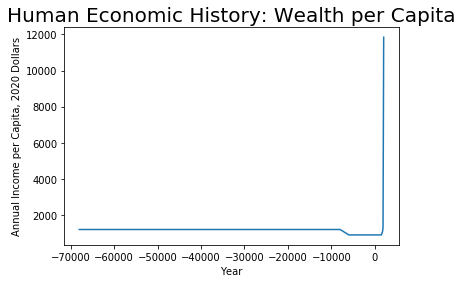

In [11]:
# now we examine our estimates, looking at some pictures.
#
# first, how wealthy—in annual income-per-capita terms—
# has the average human been over the past 70,000 years? 
# 
# this code cell shows us:

long_run_growth_df['income_level'].plot()
plt.title('Human Economic History: Wealth per Capita', size=20)
plt.xlabel('Year')
plt.ylabel('Annual Income per Capita, 2020 Dollars')

Text(0, 0.5, 'Millions')

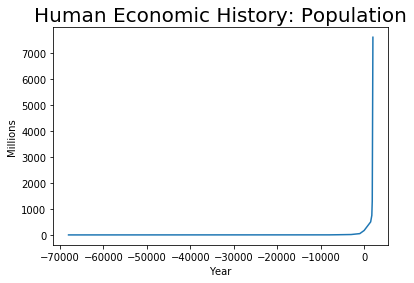

In [12]:
# how numerous has the human race been over the past 
# 70,000 years? 

# write code in this cell to show us. be sure to give
# your graph a title, and x-axis and y-axis labels,
# so that your readers—especially you in the future—
# can quickly understand what the graph is a graph of:

long_run_growth_df['population'].plot()
plt.title('Human Economic History: Population', size=20)
plt.xlabel('Year')
plt.ylabel('Millions')
                   

Text(0, 0.5, 'Index of Useful Ideas Stock')

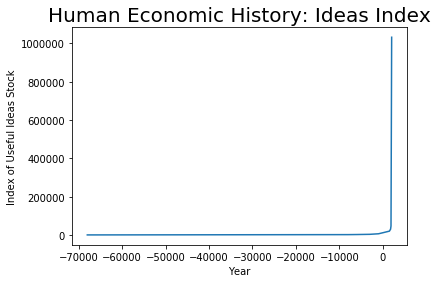

In [27]:
# and how much knowledge has humanity, considered as
# an anthology intelligence, commanded? what has been
# the value of an index of the worth of humanity's
# technological & organizational knowledge—our ability
# to manipulate nature and to organize ourselves in
# order to accomplish our purposes to live well?
# 
# how does the "human_ideas_index" variable look over time?:

long_run_growth_df['human_ideas_index'].plot()
plt.title('Human Economic History: Ideas Index', size=20)
plt.xlabel('Year')
plt.ylabel('Index of Useful Ideas Stock')

Freaky, no?

This is why U.C. Davis economic historian Greg Clark says that there is really only one graph that is important in economic history.

After the spring of coronavirus, we are used to exponential growth processes—things that explode, but only after a time in which they gather force, and which look like straight line growth on a graph plotted on a logarithmic scale. Let us plot income levels, populations, and ideas stock values on log scales and see what we see:

Text(0, 0.5, 'Log Annual Income per Capita, 2020 Dollars')

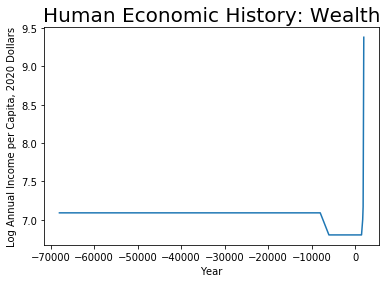

In [14]:
# let us look, era-by-era, at how wealthy humanity is, 
# measured by annual income per capita—but using a
# logarithmic scale:

np.log(long_run_growth_df['income_level']).plot()
plt.title('Human Economic History: Wealth', size=20)
plt.xlabel('Year')
plt.ylabel('Log Annual Income per Capita, 2020 Dollars')

Text(0, 0.5, 'Log Millions')

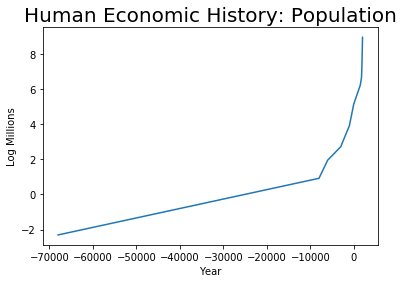

In [15]:
# let us look at the annual growth rate of the human
# population—again using a logarithmic scale.
#
# again, be sure to provide labels!:

np.log(long_run_growth_df['population']).plot()
plt.title('Human Economic History: Population', size=20)
plt.xlabel('Year')
plt.ylabel('Log Millions')          

Text(0, 0.5, 'Log Index of Useful Ideas Stock')

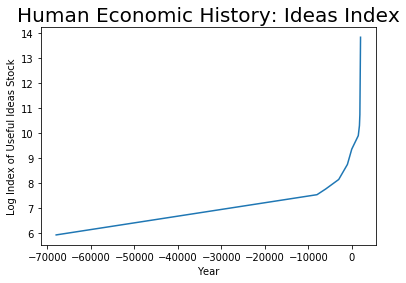

In [16]:
# let us look at the annual growth rate of our value
# of useful ideas index—again using a logarithmic scale:

np.log(long_run_growth_df['human_ideas_index']).plot()
plt.title('Human Economic History: Ideas Index', size=20)
plt.xlabel('Year')
plt.ylabel('Log Index of Useful Ideas Stock')

### B. Making things prettier

In [17]:
# we have seen that we can simply print a dataframe by
# putting its name by itself on the last line of a code 
# cell, but the printing is not very pretty:

long_run_growth_df

,human_ideas_index,income_level,population
year,,,
-68000,379.47,1200.0,0.1
-8000,1897.37,1200.0,2.5
-6000,2381.18,900.0,7.0
-3000,3485.68,900.0,15.0
-1000,6363.96,900.0,50.0
1,11734.56,900.0,170.0
1500,20124.61,900.0,500.0
1770,30124.74,1100.0,750.0
1870,46872.17,1300.0,1300.0


In [18]:
# we can make the printing prettier by defining a format dictionary
#
# to do so, we construct an object called `format_dict` (or 
# whatever other name we choose), and we then feed that object
# to the dataframe. thus we tell the dataframe that we want it 
# to evaluate itself using its `.style` method, and that `style()`
# should use its `.format()` submethod to understand what the 
# `format_dict` object is asking it to do:

format_dict = {'year': '{d}', 'human_ideas_index': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}'}

long_run_growth_df.style.format(format_dict)

,human_ideas_index,income_level,population
year,,,
-68000,379,"$1,200",0.1
-8000,"1,897","$1,200",2.5
-6000,"2,381",$900,7.0
-3000,"3,486",$900,15.0
-1000,"6,364",$900,50.0
1,"11,735",$900,170.0
1500,"20,125",$900,500.0
1770,"30,125","$1,100",750.0
1870,"46,872","$1,300","1,300.0"


Text(0, 0.5, 'Annual Average Change in the Logarithm')

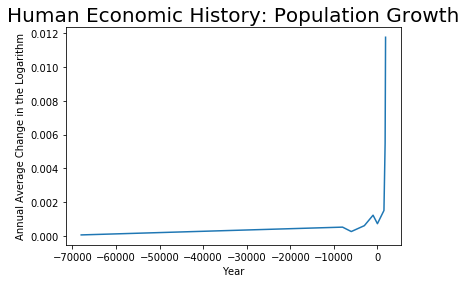

In [19]:
# remember those growth rates we calculated and then
# stuffed into their own dataframe? we can take 
# a look at them as well.
#
# first let's graph population growth:

long_run_growth_rates_df['n'].plot()
plt.title('Human Economic History: Population Growth', size=20)
plt.xlabel('Year')
plt.ylabel('Annual Average Change in the Logarithm')

Text(0, 0.5, 'Annual Average Change in the Logarithm')

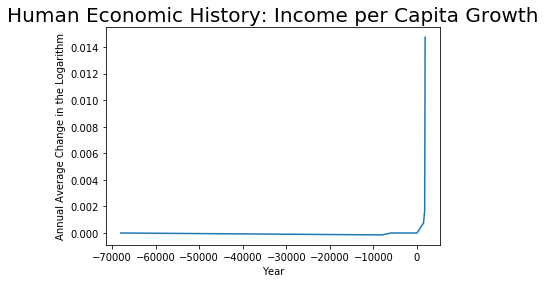

In [20]:
# now let's graph growth in real income per capita:

long_run_growth_rates_df['g'].plot()
plt.title('Human Economic History: Income per Capita Growth', size=20)
plt.xlabel('Year')
plt.ylabel('Annual Average Change in the Logarithm')

In [21]:
# and look at the growth-rates dataframe itself again:

long_run_growth_rates_df

,span,h,g,n
initial_year,,,,
-68000,60000.0,0.000027,0.000000,0.000054
-8000,2000.0,0.000114,-0.000144,0.000515
-6000,3000.0,0.000127,0.000000,0.000254
-3000,2000.0,0.000301,0.000000,0.000602
-1000,1001.0,0.000611,0.000000,0.001223
1,1499.0,0.000360,0.000000,0.000720
1500,270.0,0.001494,0.000743,0.001502
1770,100.0,0.004421,0.001671,0.005500
1870,150.0,0.020615,0.014729,0.011772


This table is especially ugly. We really do need to reformat it:

In [22]:
# here making the printing prettier really matters—for 
# us humans, at least, as we try to read & understand 
# what is going on:

format_dict = {'initial_year':'{0:.0f}', 'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}'}

long_run_growth_rates_df.style.format(format_dict)

,span,h,g,n
initial_year,,,,
-68000,60000,0.003%,0.00%,0.01%
-8000,2000,0.011%,-0.01%,0.05%
-6000,3000,0.013%,0.00%,0.03%
-3000,2000,0.030%,0.00%,0.06%
-1000,1001,0.061%,0.00%,0.12%
1,1499,0.036%,0.00%,0.07%
1500,270,0.149%,0.07%,0.15%
1770,100,0.442%,0.17%,0.55%
1870,150,2.061%,1.47%,1.18%


Suppose you wanted to show the growth rate of income-per-capita g and of population n in each era to three decimal places. How would you do it?

In [23]:
# to three decimal places;

format_dict = {'initial_year':'{0:.0f}', 'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.3%}', 'n': '{0:,.3%}'}

long_run_growth_rates_df.style.format(format_dict)

,span,h,g,n
initial_year,,,,
-68000,60000,0.003%,0.000%,0.005%
-8000,2000,0.011%,-0.014%,0.051%
-6000,3000,0.013%,0.000%,0.025%
-3000,2000,0.030%,0.000%,0.060%
-1000,1001,0.061%,0.000%,0.122%
1,1499,0.036%,0.000%,0.072%
1500,270,0.149%,0.074%,0.150%
1770,100,0.442%,0.167%,0.550%
1870,150,2.061%,1.473%,1.177%


In [24]:
# finally, add a note to the end of each observation, reminding
# us of what was going on in human history back in each of the
# eras into which we have divided it

eras = ['at the dawn', 'agriculture & herding', 'proto-agrarian age',
        'writing', 'axial age', 'dark & middle age slowdown', 'commercial revolution',
        'industrial revolution', 'modern economic growth', 'whatever the 21st century brings']

long_run_growth_df['eras'] = eras

format_dict = {'year': '{d}', 'human_ideas_index': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}'}

long_run_growth_df.style.format(format_dict)

,human_ideas_index,income_level,population,eras
year,,,,
-68000,379,"$1,200",0.1,at the dawn
-8000,"1,897","$1,200",2.5,agriculture & herding
-6000,"2,381",$900,7.0,proto-agrarian age
-3000,"3,486",$900,15.0,writing
-1000,"6,364",$900,50.0,axial age
1,"11,735",$900,170.0,dark & middle age slowdown
1500,"20,125",$900,500.0,commercial revolution
1770,"30,125","$1,100",750.0,industrial revolution
1870,"46,872","$1,300","1,300.0",modern economic growth


In [25]:
# finally, add a note to the end of each observation, reminding
# us of what was going on in human history back in each of the
# eras into which we have divided it

eras = eras[0:9]

long_run_growth_rates_df['era'] = eras

format_dict = { 'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}'}

long_run_growth_rates_df.style.format(format_dict)

,span,h,g,n,era
initial_year,,,,,
-68000,60000,0.003%,0.00%,0.01%,at the dawn
-8000,2000,0.011%,-0.01%,0.05%,agriculture & herding
-6000,3000,0.013%,0.00%,0.03%,proto-agrarian age
-3000,2000,0.030%,0.00%,0.06%,writing
-1000,1001,0.061%,0.00%,0.12%,axial age
1,1499,0.036%,0.00%,0.07%,dark & middle age slowdown
1500,270,0.149%,0.07%,0.15%,commercial revolution
1770,100,0.442%,0.17%,0.55%,industrial revolution
1870,150,2.061%,1.47%,1.18%,modern economic growth


### C. Thinking about what we have seen

There are some obvious things to get from these numbers. Here is my take:

The invention of agriculture—or perhaps it was the settling-down—mattered.

Before 8000 years ago, most invention and innovation was figuring out what light and easy-to-carry tools you needed to flourish in new or changing environments.

After 8000 years ago, invention and innovation got charged: stable location and population density greatly expanded what stuff could be useful, and greatly aided social memory. The rate of increase of the stock of valuable ideas about technology and organization quadrupled with the coming of agriculture. We can see the coming of agriculture as the first major watershed in the story of very long-run human economic history.

Moreover, over the next several thousand years there was definitely a two-heads-are-better-than-one phenomenon as more people applying their brains and communicating with each other further increased the rate of growth. We saw a further doubling of the proportional pace of growth of the human useful ideas stock with the coming of cities (and their power to dominate and concentrate resources), record-keeping, and reading 5000 years ago. We saw a further doubling 3000 years ago, with the coming of civilization: what some call the “axial age”.

But then, after about the year one (probably better-dated to 150) according to the most-used current calendar, the proportional growth rate of the ideas stock dropped. Before the year one, we could say that humanity, considered as a time-binding anthology intelligence, was undergoing super-exponential growth in its knowledge and capabilities. After the year one—or 150–that was no longer true. We can see this arrival of the mid-first millennium Eurasian dark age—the late-antiquity pause—as a second watershed.

Then, starting around 1500, we see three more watersheds:

(1) The coming of the commercial revolution era and the knitting together economically of the entire world via ocean transport produced a renewed worldwide acceleration in the proportional pace of ideas-stock growth: roughly a quadrupling, to rates of growth that had never been seen outside of areas in the Mediterranean, Mesopotamia, or north China that were relatively small portions of the globe. 

(2) 1770 saw the coming of the industrial revolution era, at first very highly concentrated in the northwestern tip of Eurasian continent: it more than tripled the proportional rate of ideas stock growth from its already unprecedentedly high level. 

(3) Then, about a century later, with the coming (a) of full globalization as we know it, (b) of the industrial research lab to rationalize and routinize the creation and development of technologies, and (c) of the modern corporation to rationalize and routinize their global deployment, came the era of modern economic growth that we live in. Since 1870 or so, the proportional growth rate of the human ideas stock has not been the 0.035% per year of the first millennium and a half, or the 0.15% per year of the commercial revolution era, or even the 0.45% per year of the 1770 to 1870 industrial revolution era. It has, rather, been more than four times as great as even this last: more than 2% per year.

That is the "innovation" part of very long-run human economic history since the invention of agriculture. How about the "fecundity and demography" part? And the "resources" part?

It is a fact that the typical human of 1500 lived little or no better than the typical human of -3000. 

Atypical humans, of course, lived much better in 1500: Gilgamesh, King of Uruk in -3000, may or may not have been absolute master of thousands, but for him the consumption goods at his disposal we’re little more than bread and meat for nourishment, fleeces and simple textiles to lie on for comfort, and beer for amusement-Even to obtain cedarwood required, for Gilgamesh, a significant military expedition and struggle. 

But the typical human standard of living was set by Malthusian pressure: People sought to increase their numbers over the generations. But slow growth of technology limited the long run rate of population increase to perhaps twice the slow rate of ideas stock growth. What was the mechanism? Limited resources. Because of limited resources, more mouths meant each had to be fed off of a smaller plot of land. Even though each mouth comes with two hands, average productivity fell. That fall continued until nutrition was poor enough that disease and famine carried enough people away to limit population growth to the Malthusian warranted rate. That kept the bulk of humanity poor: a standard of living equivalent, roughly, to what the World Bank today would call $2.50 a day.

With the growth acceleration of the commercial revolution 1500 to 1770, technology begin to gain a few steps on fecundity—the potato and maize-corn were big players here. 

With the 1770 to 1870 industrial revolution saw more. The world in 1870 had a previously-unimaginable 1.3 billion people. They livedf at a typical standard of not 2.50 but perhaps 4 a day.

But it is the post-1870 modern economic growth that has seen the real explosion of wealth. And it has been coupled with the demographic transition. Humanity has decided it is rich enough to be able to afford to and to desire to restrict its fertility. So we now approach zero population growth.

We now have almost 50 times as many people on the earth living almost 15 times as well as we had back in the year one.


# 3. You are done!

You're done with Problem set 1! Be sure to print it to pdf and send it to us!